In [1]:
# start with same libraries as vector tutorial
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

/root/miniconda/envs/vectorenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%run -i load_data.py

In [3]:
co2_data_table.head()

Reference     Site Type  Latitude  Longitude  DateTime  \
0  Alin and Richey, 2012  small stream   -10.066    -67.606  20040701   
1  Alin and Richey, 2012  small stream   -10.066    -67.606  20040701   
2  Alin and Richey, 2012  small stream   -10.066    -67.606  20040701   
3  Alin and Richey, 2012  small stream   -10.066    -67.606  20040701   
4  Alin and Richey, 2012  small stream   -10.066    -67.606  20040701   

   Altitude  Discharge  Stream Slope  Width  Depth  \
0     150.0        NaN           NaN    NaN    NaN   
1     150.0        NaN           NaN    NaN    NaN   
2     150.0        NaN           NaN    NaN    NaN   
3     150.0        NaN           NaN    NaN    NaN   
4     150.0        NaN           NaN    NaN    NaN   

                  ...                  Air Temperature  DO  Chl a    CO2   k  \
0                 ...                             28.1 NaN    NaN  140.5 NaN   
1                 ...                             28.1 NaN    NaN  140.5 NaN   
2                 ...                             28.1 NaN    NaN  140.5 NaN   
3                 ...                             28.1 NaN    NaN  140.5 NaN   
4                 ...                             28.1 NaN    NaN  140.5 NaN   

     k600  CO2 Flux  CO2 Flux.1  \
0 -18.104   1381.28         NaN   
1 -18.320   1267.75         NaN   
2 -35.512   1449.39         NaN   
3 -20.488   1025.55         NaN   
4 -22.272   1411.55         NaN   

                                              Source  \
0  Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...   
1  Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...   
2  Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...   
3  Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...   
4  Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...   

                             geometry  
0  POINT (-67.60599999999999 -10.066)  
1  POINT (-67.60599999999999 -10.066)  
2  POINT (-67.60599999999999 -10.066)  
3  POINT (-67.60599999999999 -10.066)  
4  POINT (-67.60599999999999 -10.066)  

[5 rows x 27 columns]

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

pop_est continent         name iso_a3  gdp_md_est  \
0  28400000.0      Asia  Afghanistan    AFG     22270.0   
1  12799293.0    Africa       Angola    AGO    110300.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...

## Visualize the map

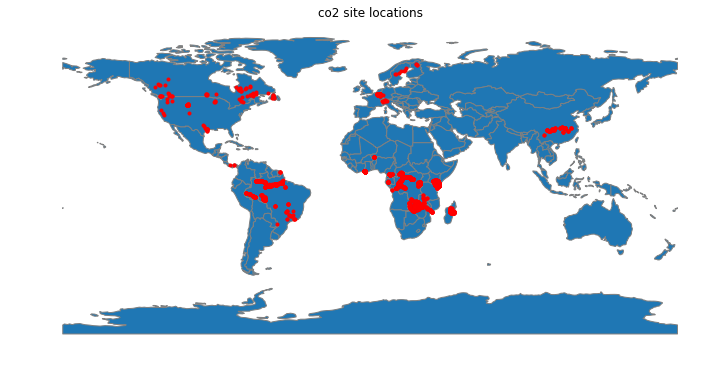

In [5]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('co2 site locations')
world.plot(ax=ax, edgecolor='gray')
co2_geo_data_table.plot(ax=ax, marker='.', color='r')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');

## Subsetting North America & Draw Interactive Map

In [6]:
NA_co2_geo_data_table = co2_geo_data_table[co2_geo_data_table.Latitude.between(23, 90) & 
                                           co2_geo_data_table.Longitude.between(-131, -68)] 

In [7]:
import folium
firstmap = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=4)
for index, row in NA_co2_geo_data_table.iterrows():
     iconcolor='blue'
#      if row['Status'] == "major":
#          iconcolor = 'darkred'
#      elif row['Status'] == 'action':
#          iconcolor = 'lightred'
     marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}:{}".format(row['Reference'], row['Site Type']))
     marker.add_to(firstmap)
firstmap

## Clustering Markers

In [8]:
import folium
from folium.plugins import MarkerCluster

mymap1 = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=4)

mcluster = MarkerCluster().add_to(mymap1)

for index, row in NA_co2_geo_data_table.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row.Reference).add_to(mcluster)

mymap1

In [9]:
import folium
from folium.plugins import MarkerCluster

mymap2 = folium.Map(location=[co2_geo_data_table['Latitude'].mean(),co2_geo_data_table['Longitude'].mean()], 
                    tiles='Stamen Terrain', zoom_start=2)

mcluster2 = MarkerCluster().add_to(mymap2)

for index, row in co2_geo_data_table.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row.Reference).add_to(mcluster2)

mymap2